# Simple Brownian motion

We will in this notebook simulate a simple bulk 1D Brownian motion and compute the Mean Square Displacement (MSD) in order to image the Einstein's theory. Since this notebook is only for demonstration, we will here make all the particle start at the same initial position $x = 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='x-large')
rc('ytick', labelsize='x-large')
rc("axes", labelsize = "x-large")
def cm2inch(value):
    return value/2.54

In [3]:
a = 10e-6 # particle radius
kt = 4e-21 # Boltzman constant multiplied by the temperature
eta = 1e-3 # fluid viscosity (here water)
D = kt / (6 * np.pi * eta * a) # Diffusion coefficient

In [4]:
N = 100# number of particles trajectory simulated
L = 100000 # number of time step realised
dt = 0.1 # time step

In [5]:
# Generation of displacement using a white noise
Dx = np.sqrt(2*D)*np.random.normal(0, np.sqrt(dt), (L,N))

In [6]:
Xs = np.concatenate(([np.zeros(N)],np.cumsum(Dx, axis = 0)))
t = np.arange(len(Xs)) * dt

Text(0, 0.5, 'x position ($\\mu$m)')

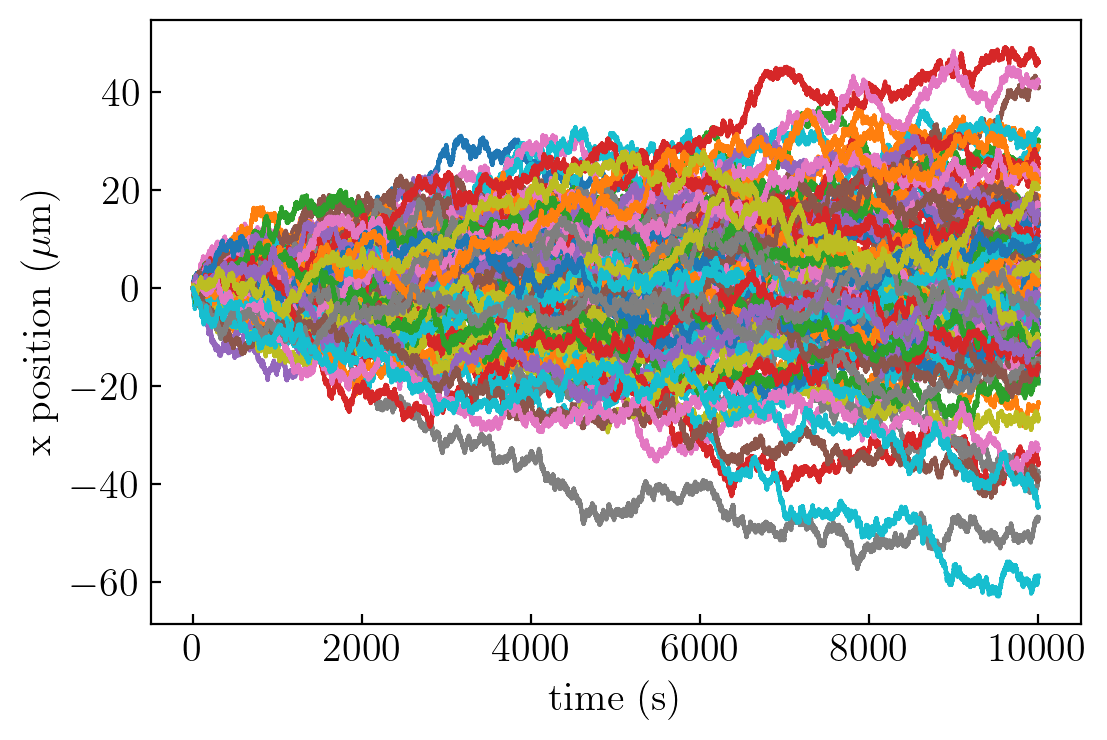

In [7]:
plt.figure()

for i in range(N):
    plt.plot(t, Xs[:,i]* 1e6) 

plt.xlabel("time (s)")
plt.ylabel("x position ($\mu$m)")

In [8]:
# Compute the MSD
from tqdm import trange
MSD = []
t_MSD = []
for i in trange(1,1000,60):
    msd = 0
    for j in range(N):
        x = Xs[:,j]
        msd += np.mean((x[i:] - x[:-i])**2)
        
    MSD.append(msd/N)
    t_MSD.append(i)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:03<00:00,  5.43it/s]


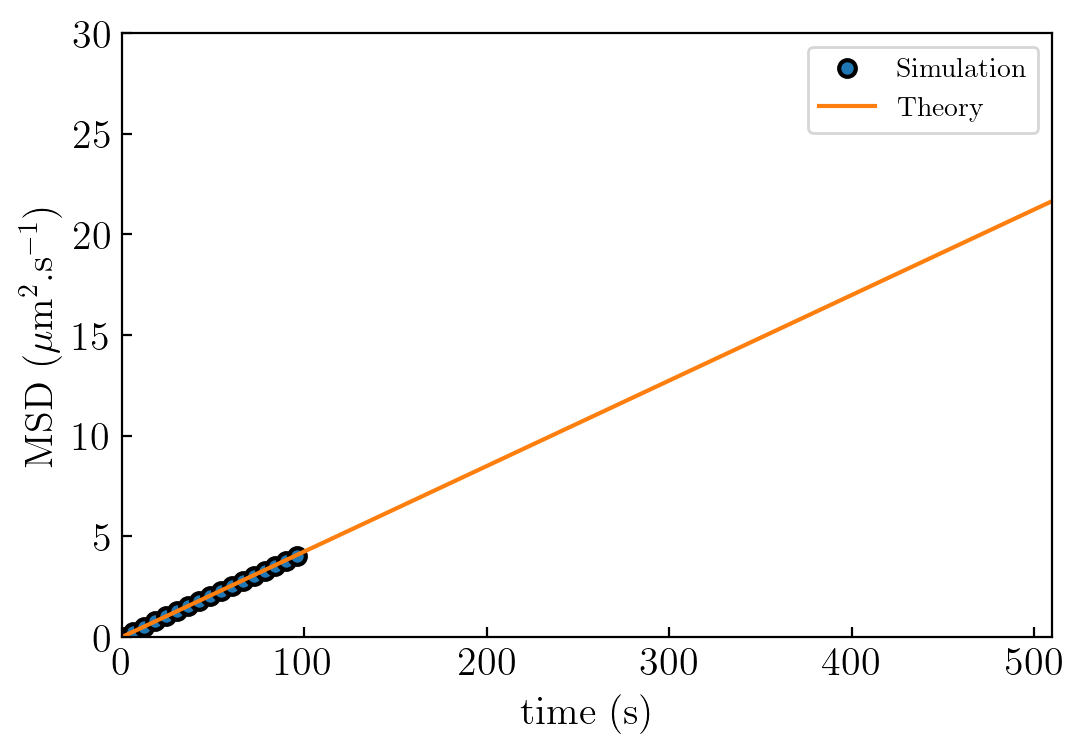

In [9]:
plt.plot(t[t_MSD],np.array(MSD)*1e12,"o", label = "Simulation")
plt.plot(t, 2*D*t * 1e12, label = "Theory")
plt.xlim((0,510))
plt.ylim((0,30))
plt.xlabel("time (s)")
plt.ylabel("MSD ($\mu \mathrm{m^2.s^{-1}} $)")
plt.legend()

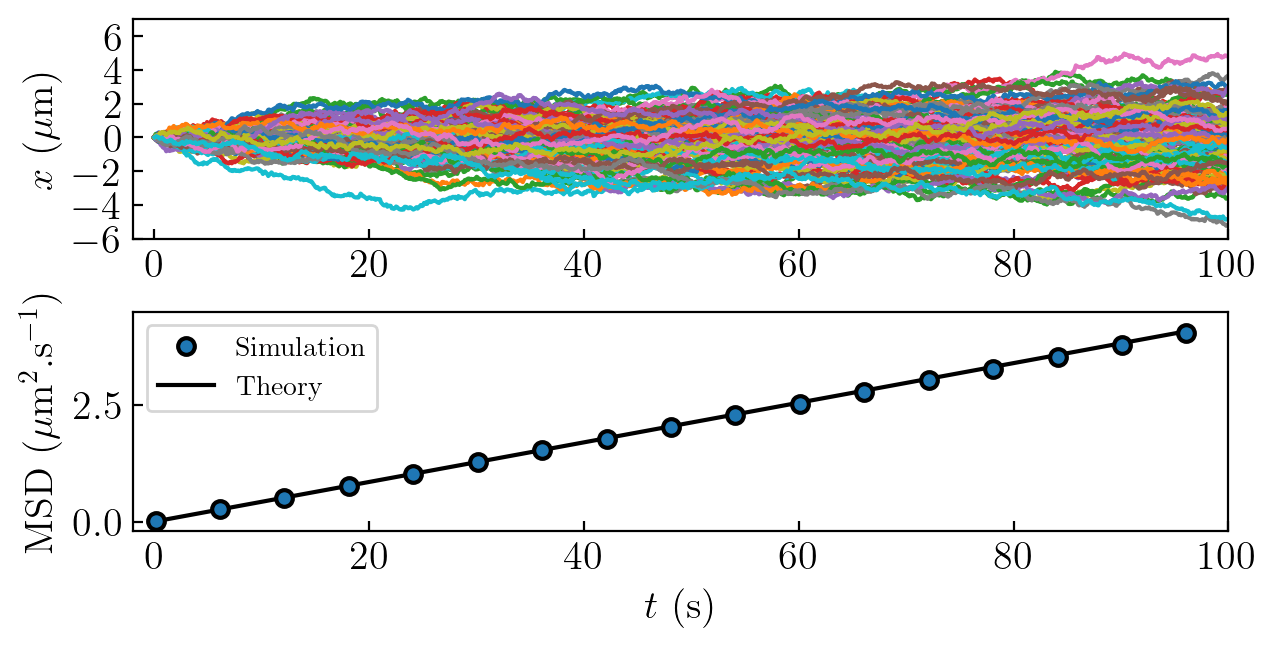

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (cm2inch(16),cm2inch(8)))
for i in range(N):
    ax1.plot(t[:1000], Xs[:1000,i]* 1e6) 

ax1.set( ylabel="$x$ ($\mu$m)", yticks = np.arange(-6, 10, 2), ylim=(-6,7), xlim=(-2,100))

ax2.plot(t[t_MSD],np.array(MSD)*1e12,"o", label = "Simulation")
ax2.plot(t[t_MSD], 2*D*t[t_MSD] * 1e12, label = "Theory", zorder = - 1, color = "k")
ax2.set(xlabel="$t$ (s)", ylabel="MSD ($\mu \mathrm{m^2.s^{-1}} $)", xlim = (-2,100), ylim = (-0.2,4.5))
plt.legend(frameon = True)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=1.0)
                               
plt.savefig("Brown_exemple.pdf")

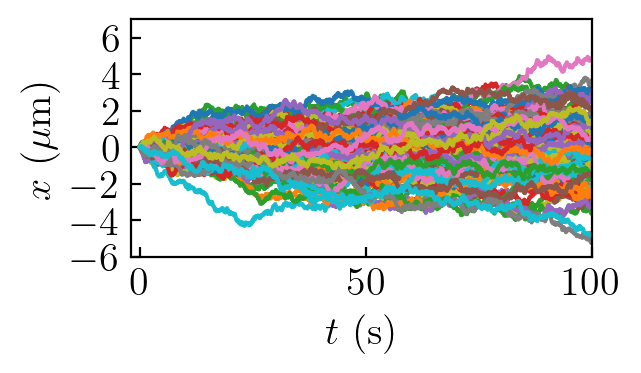

In [11]:
plt.figure(figsize = (cm2inch(1.68*5),cm2inch(5)))
for i in range(N):
    plt.plot(t[:1000], Xs[:1000,i]* 1e6) 
    
ax1=plt.gca()
ax1.set( ylabel="$x$ ($\mu$m)",xlabel=("$t$ (s)") ,yticks = np.arange(-6, 10, 2), ylim=(-6,7), xlim=(-2,100))
plt.tight_layout()
plt.savefig("traj.svg")

In [12]:
def gauss(Dx, sigma):
    P = np.exp(-Dx**2 / 2 / sigma) * 1/np.sqrt(2*np.pi * sigma)
    return P

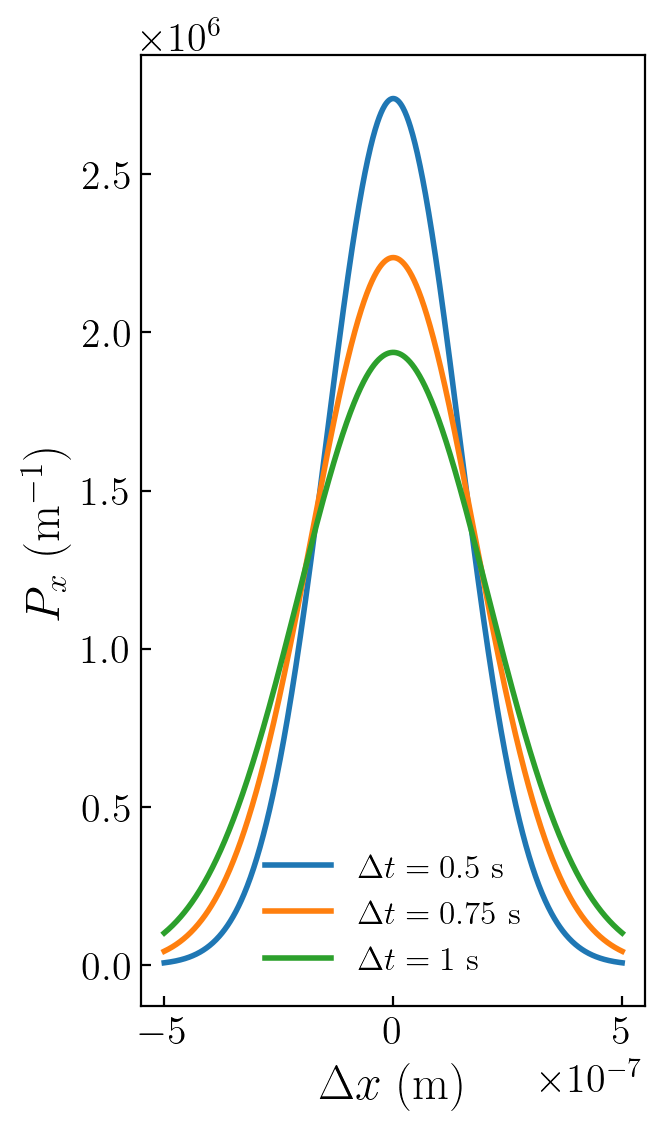

In [23]:
plt.figure(figsize = (cm2inch(8.7),cm2inch(1.68*8.7)))

t_d = [0.5,0.75, 1]
Dx = np.linspace(-0.5e-6, 0.5e-6, 1000)

for i in t_d:
    plt.plot(Dx, gauss(Dx, 2*D*i), label="$\Delta t = " + str(i) + "$ s", linewidth=2 )
    
plt.legend(frameon = False, fontsize="large")
plt.xlabel("$\Delta x$ (m)", fontsize="xx-large")
plt.ylabel("$P_x$ ($\\mathrm{m^{-1}}$)", fontsize="xx-large")
plt.tight_layout()
plt.savefig("distrib.svg")

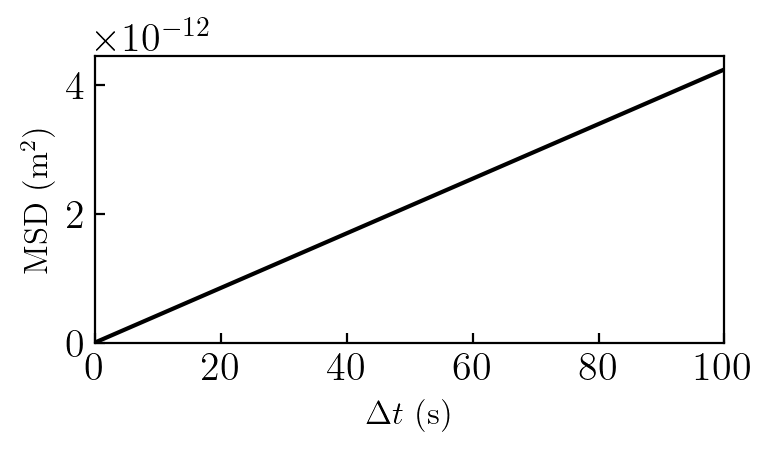

In [26]:
plt.figure(figsize = (cm2inch(1.68*6),cm2inch(6)))
t_m= np.linspace(0,100, 100)
plt.plot(t_m,2*D*t_m, color = "k")
plt.xlim(0,100)
plt.ylim(0,None)
plt.ylabel("MSD (m$^2$)", fontsize="large")
plt.xlabel("$\Delta t$ (s)", fontsize="large")
plt.tight_layout()
plt.savefig("MSD_th.svg")

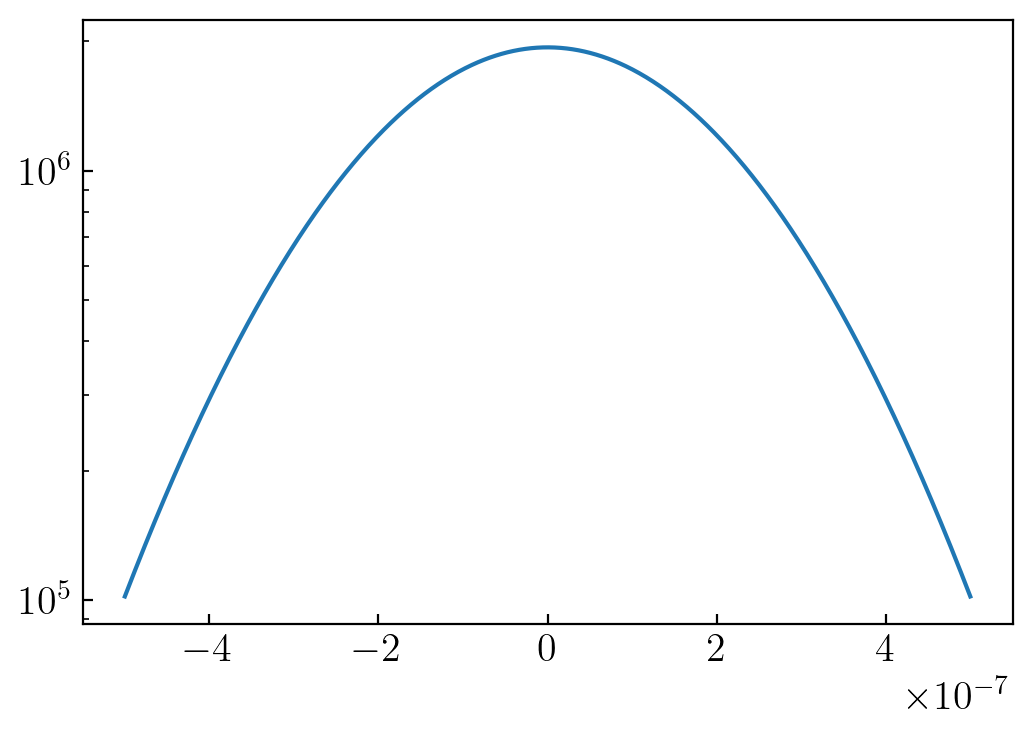

In [27]:
plt.semilogy(Dx, gauss(Dx, 2*D*i))

In [28]:
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'tab:cyan',
]

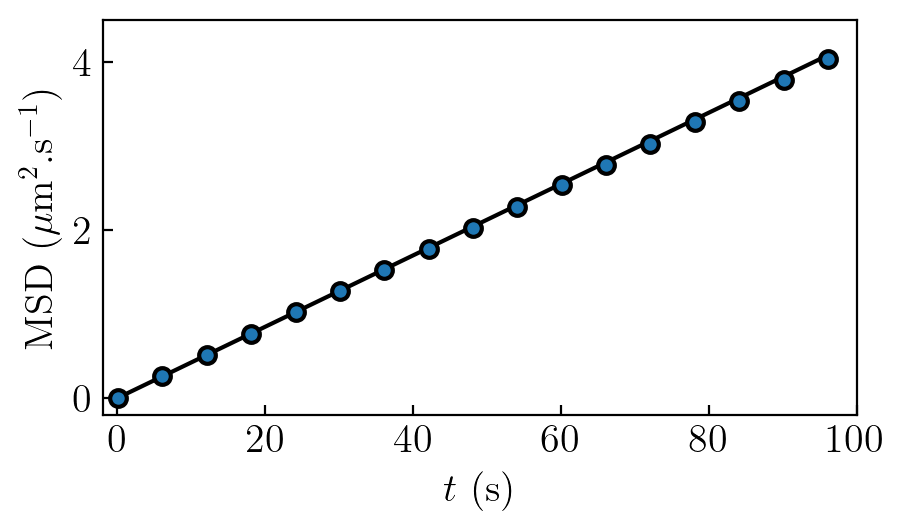

In [29]:
plt.figure(figsize = (cm2inch(1.68*7),cm2inch(7)))
ax2=plt.gca()
ax2.plot(t[t_MSD],np.array(MSD)*1e12,"o", label = "Simulation")
ax2.plot(t[t_MSD], 2*D*t[t_MSD] * 1e12, label = "Théorie", zorder = - 1, color = "k")
ax2.set(xlabel="$t$ (s)", ylabel="MSD ($\mu \mathrm{m^2.s^{-1}} $)", xlim = (-2,100), ylim = (-0.2,4.5))
plt.tight_layout()
plt.savefig("msd_sim.svg")

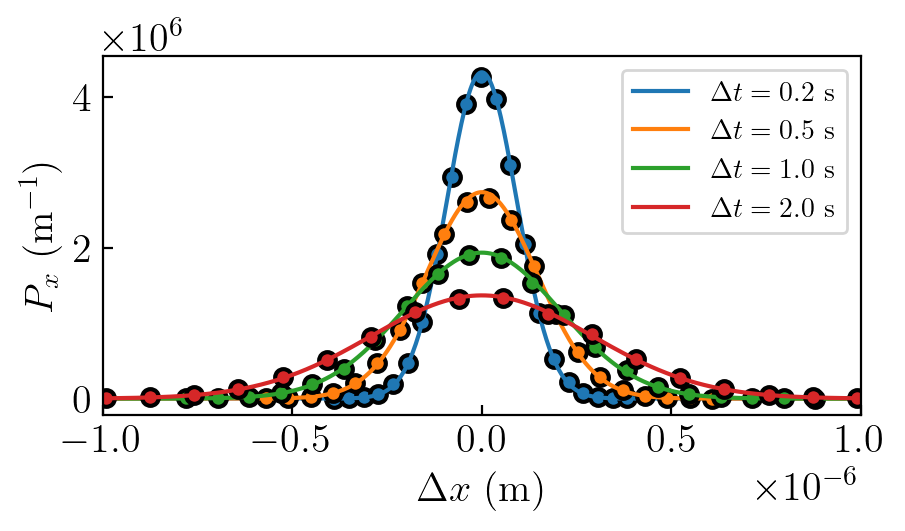

In [34]:
plt.figure(figsize = (cm2inch(1.68*7),cm2inch(7)))
dtt = [2,5, 10, 20]
Dx = np.linspace(-2e-6, 2e-6,1000)
for n,i in enumerate(dtt):
    DXX  = np.array(Xs[:-i,1]) - np.array(Xs[i:,1])
    YY, XX = np.histogram(DXX, bins=21,  density = True)
    XX = (XX[:-1] + XX[1:])/2
    plt.plot(XX,YY, "o", color = colors[n])
    plt.plot(Dx, gauss(Dx, 2*D*i*dt), label="$\Delta t = " + str(i*dt) + "$ s" )
plt.xlim(-1e-6, 1e-6)
plt.legend()
plt.xlabel("$\Delta x$ (m)")
plt.ylabel("$P_x$ ($\\mathrm{m^{-1}}$)")
plt.tight_layout()
plt.savefig("distrib_sim.svg")

In [ ]:
dt

In [ ]:
plt.plot(Xs[:,1])